In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
with open('Ames_Housing_Feature_Description.txt','r') as f:
    print(f.read())


MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [5]:
df = pd.read_csv('Ames_outliers_removed.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [9]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [10]:
df = df.drop("PID", axis = 1)

In [16]:
len(df.columns)

80

In [19]:
df.isnull().sum()>0

MS SubClass       False
MS Zoning         False
Lot Frontage       True
Lot Area          False
Street            False
                  ...  
Mo Sold           False
Yr Sold           False
Sale Type         False
Sale Condition    False
SalePrice         False
Length: 80, dtype: bool

In [22]:
100 * df.isnull().sum()/len(df)


MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [25]:
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum()/len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

функция которая отображает все колонки в которых отсутсвтуют данные и какой процент отсутствует 

In [37]:
percent_nan=percent_missing(df)

(0.0, 1.0)

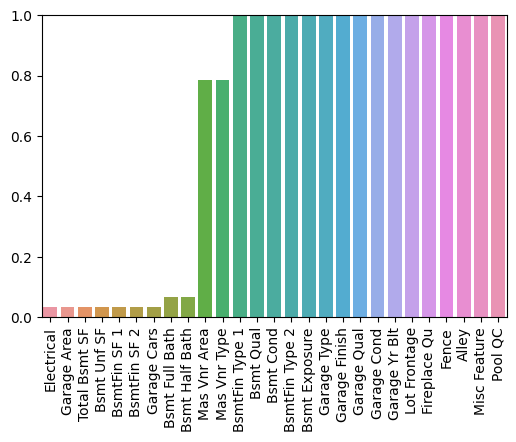

In [57]:
plt.figure(dpi=100)
sns.barplot(x=percent_nan.index ,y=percent_nan)
plt.xticks(rotation = 90)
plt.ylim(0,1)

In [44]:
df['Pool QC'].isnull().value_counts()

True     2915
False      12
Name: Pool QC, dtype: int64

In [58]:
percent_nan[percent_nan<1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [59]:
100/len(df)

0.0341646737273659

In [61]:
df[df['Electrical'].isnull()]['Garage Area']

1576    400.0
Name: Garage Area, dtype: float64

In [62]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [63]:
df = df.dropna(axis=0,subset = ['Electrical','Garage Cars'])

посмотри на всю таблицу и найди ряды где столбики с списка равны 0 

In [64]:
percent_nan = percent_missing(df)

In [65]:
percent_nan[percent_nan<1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

(0.0, 1.0)

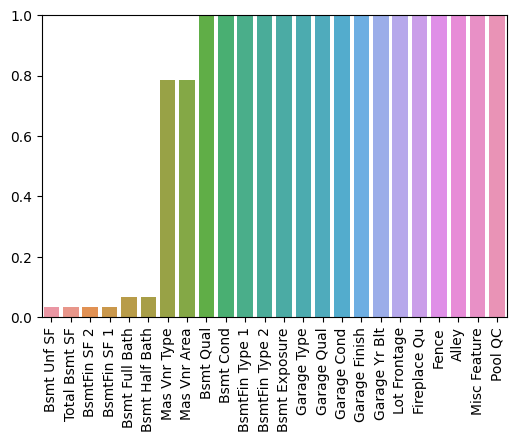

In [66]:
plt.figure(dpi=100)
sns.barplot(x=percent_nan.index ,y=percent_nan)
plt.xticks(rotation = 90)
plt.ylim(0,1)

In [68]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [69]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [70]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [71]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [72]:
percent_nan = percent_missing(df)

(0.0, 1.0)

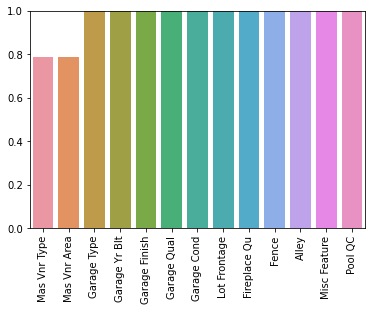

In [74]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

In [77]:
df['Mas Vnr Type']= df['Mas Vnr Type'].fillna('None')

/var/folders/8d/wwwj4v6n7h1db0y82bcw5d500000gn/T/ipykernel_49510/469031623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mas Vnr Type']= df['Mas Vnr Type'].fillna('None')


In [78]:
df['Mas Vnr Area']= df['Mas Vnr Area'].fillna(0)

/var/folders/8d/wwwj4v6n7h1db0y82bcw5d500000gn/T/ipykernel_49510/1141524290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mas Vnr Area']= df['Mas Vnr Area'].fillna(0)


In [79]:
percent_nan = percent_missing(df)

In [80]:
percent_nan

Garage Type       5.367521
Garage Yr Blt     5.401709
Garage Finish     5.401709
Garage Qual       5.401709
Garage Cond       5.401709
Lot Frontage     16.752137
Fireplace Qu     48.547009
Fence            80.478632
Alley            93.230769
Misc Feature     96.410256
Pool QC          99.589744
dtype: float64

In [83]:
garage_str_cols = ['Garage Type', 'Garage Finish','Garage Qual', 'Garage Cond']

In [84]:
df[garage_str_cols]= df[garage_str_cols].fillna('None')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [85]:
percent_nan=percent_missing(df)

In [87]:
percent_nan

Garage Yr Blt     5.401709
Lot Frontage     16.752137
Fireplace Qu     48.547009
Fence            80.478632
Alley            93.230769
Misc Feature     96.410256
Pool QC          99.589744
dtype: float64

In [89]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

/var/folders/8d/wwwj4v6n7h1db0y82bcw5d500000gn/T/ipykernel_49510/1710577415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)


In [91]:
df=df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [98]:
percent_nan=percent_missing(df)

(0.0, 30.0)

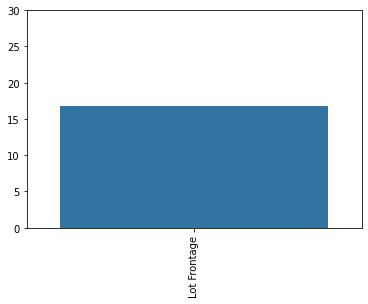

In [99]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,30)

In [97]:
df['Fireplace Qu']= df['Fireplace Qu'].fillna('None')

In [100]:
df['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2922     37.0
2923      NaN
2924     62.0
2925     77.0
2926     74.0
Name: Lot Frontage, Length: 2925, dtype: float64

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

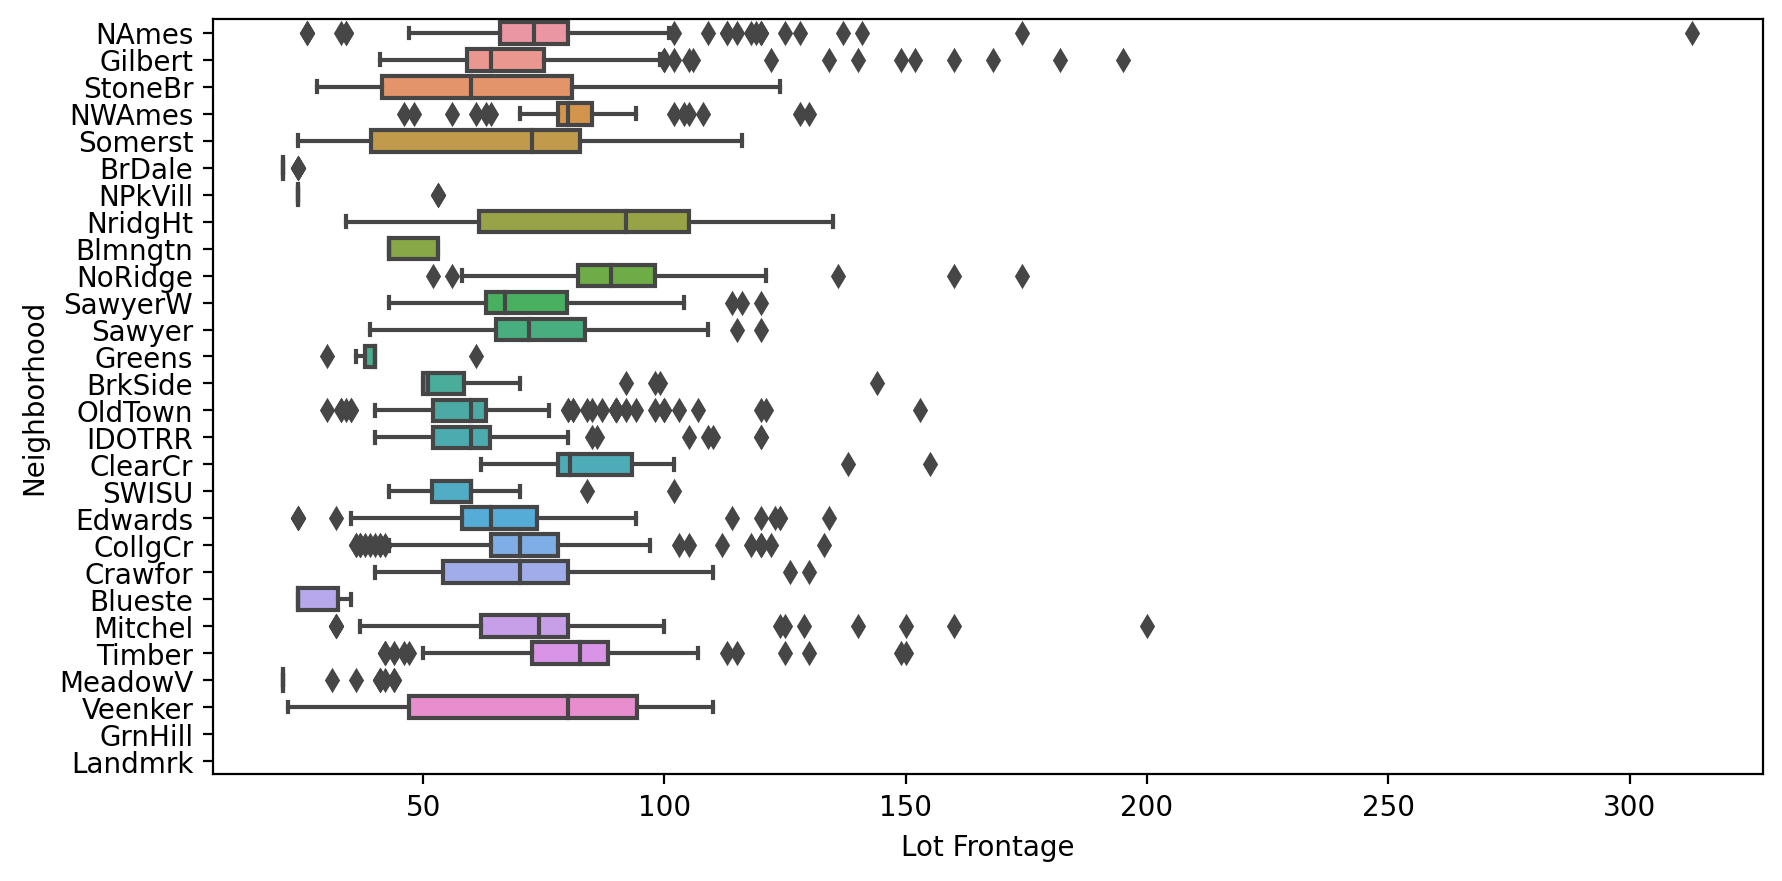

In [102]:
plt.figure(figsize=(10,5),dpi=200)
sns.boxplot(x='Lot Frontage', y='Neighborhood', data = df,orient='h')

In [103]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [106]:
df['Lot Frontage']= df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

In [109]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [108]:
df['Lot Frontage']=df['Lot Frontage'].fillna(0)

In [110]:
df['MS SubClass']= df['MS SubClass'].apply(str)

In [112]:
direction = pd.Series(['Up','Up','Down'])

In [113]:
direction

0      Up
1      Up
2    Down
dtype: object

In [115]:
pd.get_dummies(direction,drop_first=True)

,Up
0,1
1,1
2,0


In [116]:
df.select_dtypes(include = 'object')

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal
2923,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2924,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,None,None,None,None,None,Y,WD,Normal
2925,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2926
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2925 non-null   object 
 1   MS Zoning        2925 non-null   object 
 2   Lot Frontage     2925 non-null   float64
 3   Lot Area         2925 non-null   int64  
 4   Street           2925 non-null   object 
 5   Lot Shape        2925 non-null   object 
 6   Land Contour     2925 non-null   object 
 7   Utilities        2925 non-null   object 
 8   Lot Config       2925 non-null   object 
 9   Land Slope       2925 non-null   object 
 10  Neighborhood     2925 non-null   object 
 11  Condition 1      2925 non-null   object 
 12  Condition 2      2925 non-null   object 
 13  Bldg Type        2925 non-null   object 
 14  House Style      2925 non-null   object 
 15  Overall Qual     2925 non-null   int64  
 16  Overall Cond     2925 non-null   int64  
 17  Year Built    

In [119]:
my_object_df = df.select_dtypes(include = 'object')

In [120]:
my_numeric_df=df.select_dtypes(exclude='object')

In [122]:
df_objects_dummies=pd.get_dummies(my_object_df, drop_first=True)

In [123]:
my_numeric_df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,210,62,0,0,0,0,0,5,2010,215000
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,140,0,0,0,120,0,0,6,2010,105000
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,0,0,0,4,2010,244000
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,120,0,0,0,0,0,0,3,2006,142500
2923,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,164,0,0,0,0,0,0,6,2006,131000
2924,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,80,32,0,0,0,0,700,7,2006,132000
2925,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,240,38,0,0,0,0,0,4,2006,170000


In [124]:
df_objects_dummies

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2923,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2925,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [125]:
final_df = pd.concat([my_numeric_df,df_objects_dummies], axis=1)

In [126]:
final_df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,0,0,0,0,1,0,0,0,1,0
2923,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,0,0,0,0,1,0,0,0,1,0
2924,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,0,1,0,0,0,1,0
2925,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,0,0,0,0,1,0,0,0,1,0


In [127]:
final_df.corr()['SalePrice'].sort_values()

Exter Qual_TA       -0.591459
Kitchen Qual_TA     -0.527461
Fireplace Qu_None   -0.481740
Bsmt Qual_TA        -0.453022
Garage Finish_Unf   -0.422363
                       ...   
Garage Cars          0.648488
Total Bsmt SF        0.660983
Gr Liv Area          0.727279
Overall Qual         0.802637
SalePrice            1.000000
Name: SalePrice, Length: 274, dtype: float64